# ***Credit Card Fraud Detection using Machine Learning***

In [ ]:
#  Import packages

# Numpy,Pandas
import numpy as np
import pandas as pd
import datetime

# matplotlib,seaborn,pyecharts
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
# plt.style.use('ggplot')  
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Information**

This dataset is from [kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [ ]:
# read dataset
path = ('/content/drive/MyDrive/Colab Notebooks/BA project/creditcard.csv')
data = pd.read_csv(path, encoding='latin-1')

In [ ]:
# dataset information
data.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

It can be seen from the above that the data is structured data and does not need to extract feature conversion, but the data specifications of the feature ***Time*** and ***Amount*** are different from other features, and feature scaling is required.  

In [ ]:
# view basic stats of the data
data.describe().T  

,count,mean,std,min,25%,50%,75%,max
Time,284807.0000,94813.8596,47488.1460,0.0000,54201.5000,84692.0000,139320.5000,172792.0000
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,-0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V8,284807.0000,-0.0000,1.1944,-73.2167,-0.2086,0.0224,0.3273,20.0072
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950


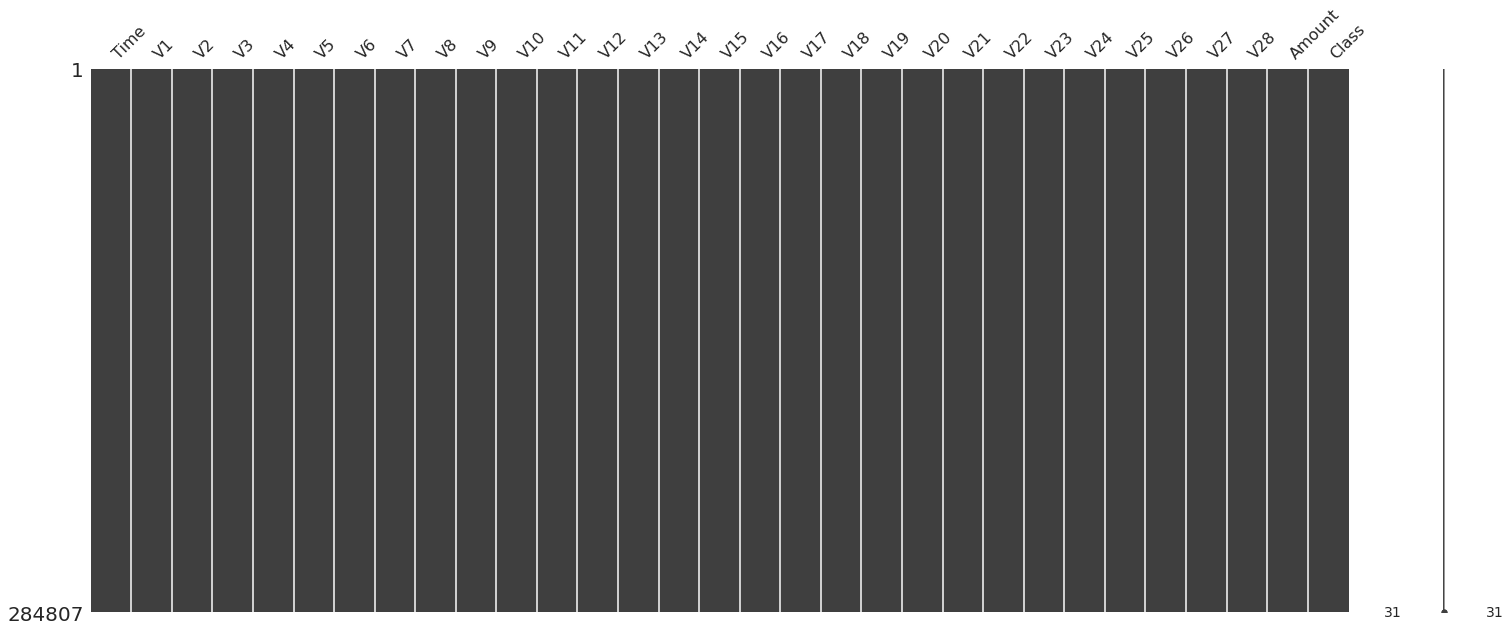

In [ ]:
# check missing value
msno.matrix(data)  # no missing value

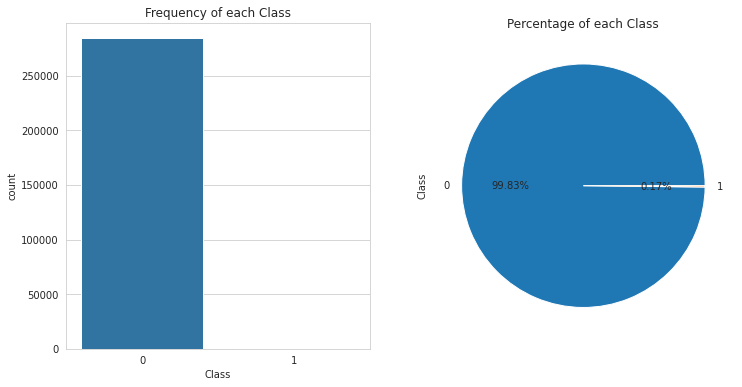

In [ ]:
# target variable distribution visualization
fig, axs = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='Class',data=data,ax=axs[0])
axs[0].set_title("Frequency of each Class")
data['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

In [ ]:
# view target variable 'Class'
data.groupby('Class').size() # 492 frauds out of 284,807 transactions -- unbalanced

Class
0    284315
1       492
dtype: int64

# **Explanatory Data Analysis**

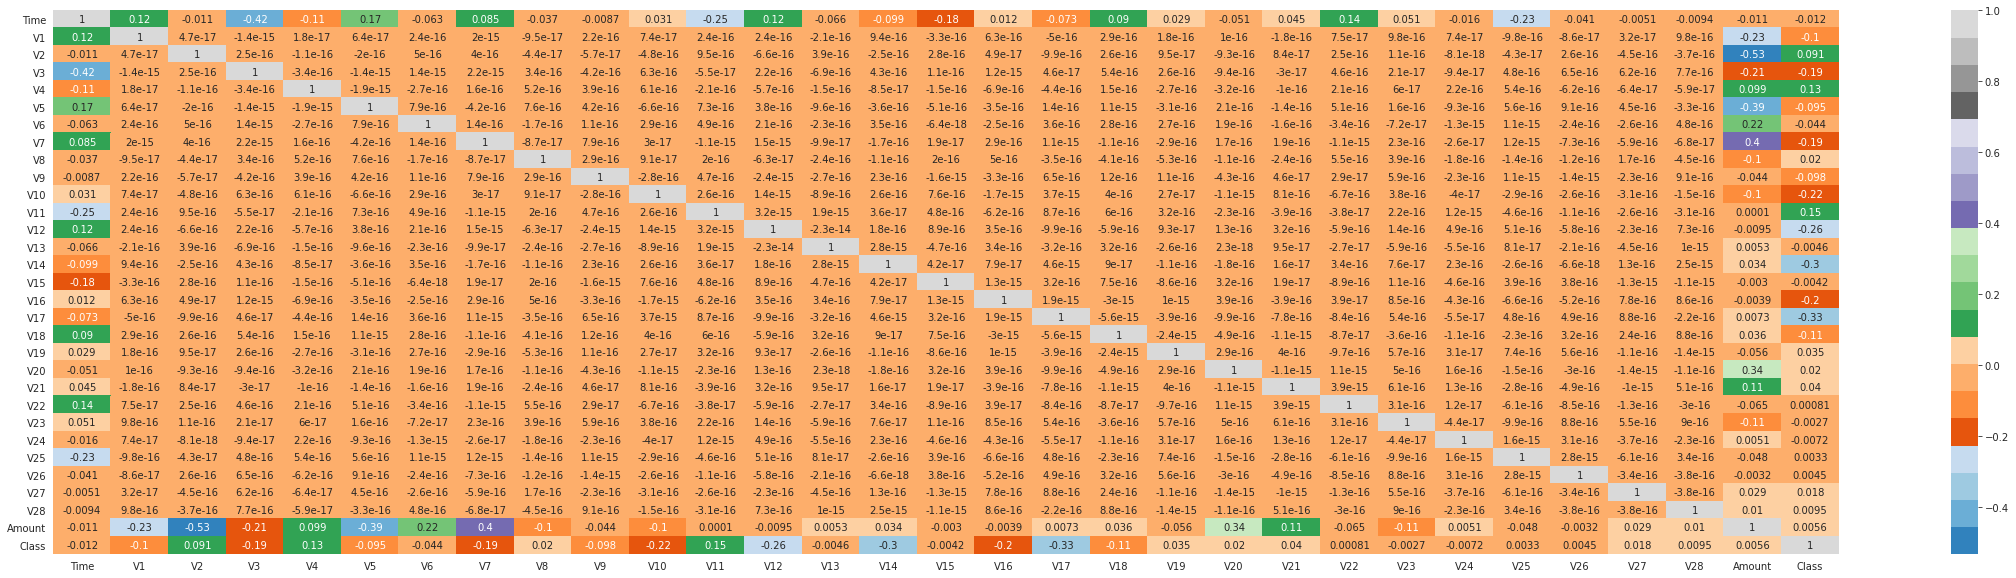

In [ ]:
# correlation matrix
plt.figure(figsize = (40,10))
sns.heatmap(data.corr(), annot = True, cmap="tab20c")
plt.show()

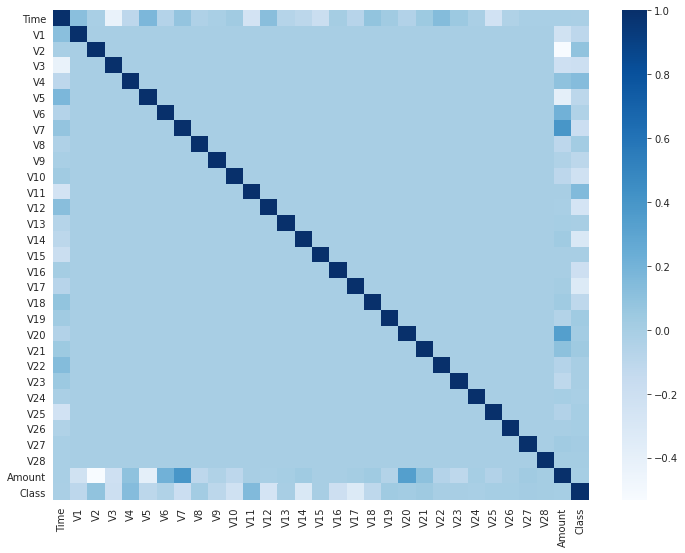

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(), vmax = 1, cmap = "Blues")
plt.show()

The heatmap above indicates that there are no high correlation values among the predictor columns. No predictor column has a high correlation value with the **Class** column either.

In [ ]:
# covert unit 'second' to 'hour'
data['Hour'] = data["Time"].apply(lambda x : divmod(x, 3600)[0]) 

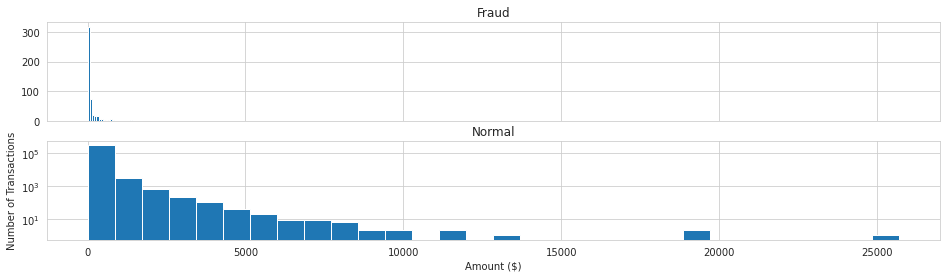

In [ ]:
# check the relationship between fraudulent transactions, transaction amount and number of transactions

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(data["Amount"][data["Class"]== 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data["Amount"][data["Class"] == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

The transaction amount of credit card fraud is scattered and small compared with that of normal credit card, which indicates that credit card thieves prefer to choose small amount transactions in order not to attract the attention of credit card owners.

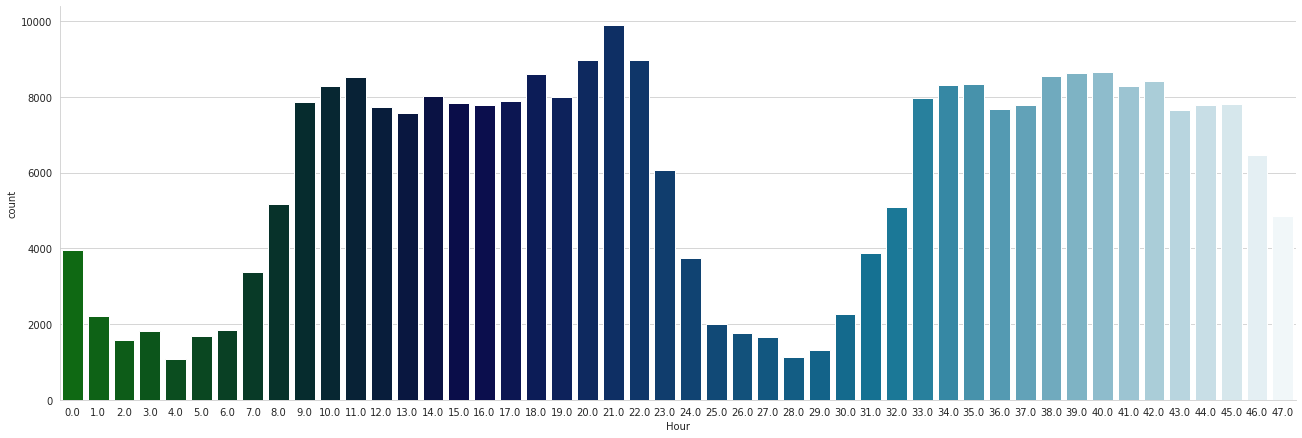

In [ ]:
# preferred period for consumption 
sns.factorplot(x="Hour", data=data, kind="count",  palette="ocean", size=6, aspect=3)

It shows that between 9am to 11pm is the high frequency period of credit card consumption.

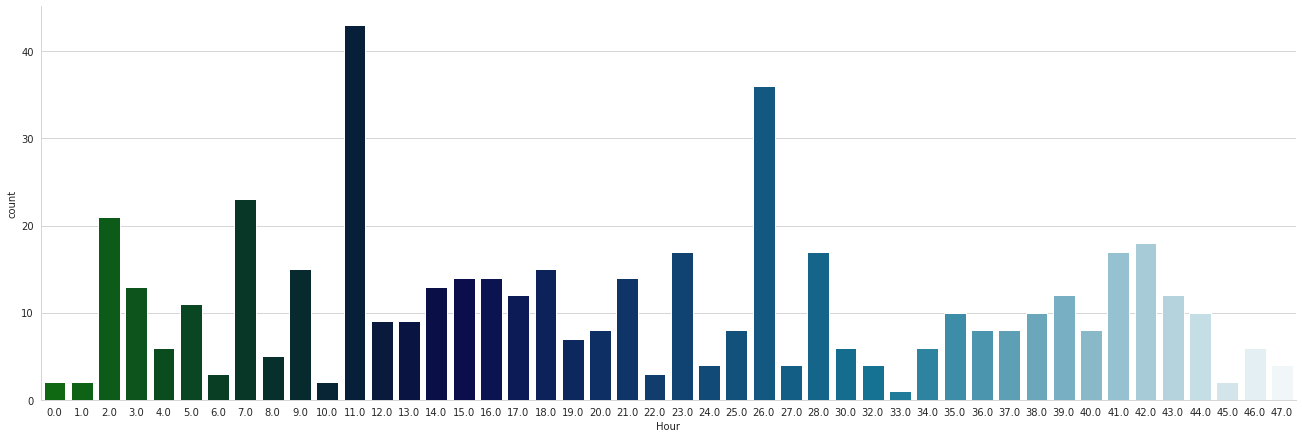

In [ ]:
# credit card fraud cases occurred time distribution
sns.factorplot(x="Hour", data=data[data["Class"]== 1], kind="count",  palette="ocean", size=6, aspect=3)

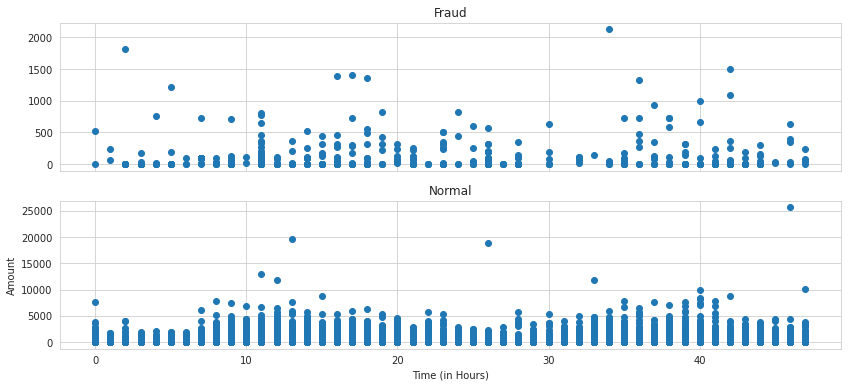

In [ ]:
#  relationship between fraudulent transactions, transaction amount and transaction time

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14,6))

ax1.scatter(data["Hour"][data["Class"] == 1], data["Amount"][data["Class"]  == 1])
ax1.set_title('Fraud')

ax2.scatter(data["Hour"][data["Class"] == 0], data["Amount"][data["Class"] == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Hours)')
plt.ylabel('Amount')
plt.show()

From the graph above, we find that 'Fraud' is not linked to 'Time' and there is no cyclical.

In [ ]:
print ("Fraud Stats Summary")
print (data["Amount"][data["Class"] == 1].describe())
print ()
print ("Normal Stats Summary")
print (data["Amount"][data["Class"]  == 0].describe())

Fraud Stats Summary
count    492.0000
mean     122.2113
std      256.6833
min        0.0000
25%        1.0000
50%        9.2500
75%      105.8900
max     2125.8700
Name: Amount, dtype: float64

Normal Stats Summary
count   284315.0000
mean        88.2910
std        250.1051
min          0.0000
25%          5.6500
50%         22.0000
75%         77.0500
max      25691.1600
Name: Amount, dtype: float64


As can be seen from the graph above, in the credit card fraud sample, the outliers occurred at a time when customers were spending more infrequently with their credit cards. The highest number of credit card fraud cases peaked at 11am on the first day with 43 cases, while the rest occurred between 11pm and 9am on the second morning, indicating that credit card thieves prefer to choose the time when credit card owners sleep and spend more frequently in order not to attract their attention. At the same time, the maximum amount of credit card theft was only $2,125.87.

# **Data Pre-processing**

### Feature selection

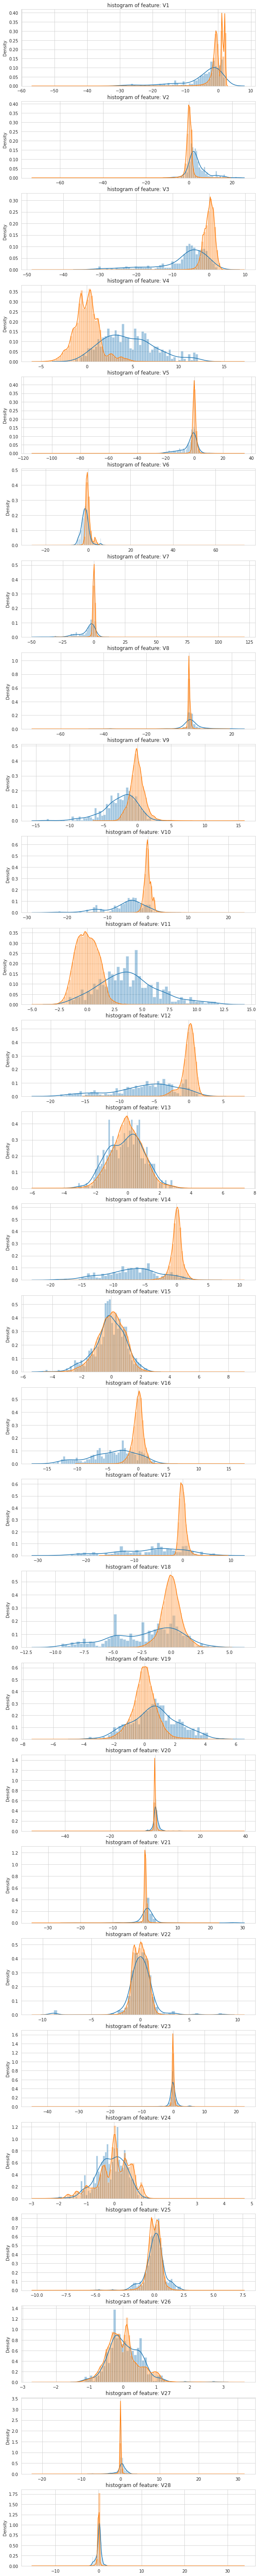

In [ ]:
v_feat = data.iloc[:,1:29].columns
plt.figure(figsize=(10,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[v_feat]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data["Class"] == 1], bins=50)
    sns.distplot(data[cn][data["Class"] == 0], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))

The above figure shows the different distributions of different variables in normal and fraudulent credit card sample. We will select the variables with significantly different distributions in different credit card states. Therefore the features V8, V13 , V15 , V20 , V21 , V22 , V23 , V24 , V25 , V26 , V27 and V28 are excluded. This is also consistent with the conclusion we draw from the correlation matrix before. The variable Time and Hour are also excluded.

We find the accuracy is lower with this feature selection, so we **ignore** this part in the following steps.

### Feature scaling

In [ ]:
data = data.drop(['Hour', 'Time'],axis=1) # drop 'Hour' and 'Time' which are not linked to our target variable 

Since the specification of the feature 'Amount' differs significantly from other features, we need to scale it.

In [ ]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1) # drop 'Amount'

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,0,0.2450
1,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,0,-0.3425
2,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,0,1.1607
3,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,0,0.1405
4,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,0,-0.0734


### Under-Sampling

Since this dataset is highly unbalanced, we use under-sampling to let it balance. We build a sample dataset containing similar distribution of normal transactions and fraudulent transactions.

In [ ]:
# separate the data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape) # number of Fraudulent transactions --> 492

(284315, 30)
(492, 30)


In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
data_new = pd.concat([legit_sample, fraud], axis=0)

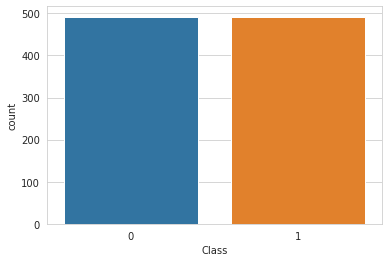

In [ ]:
sns.countplot(data_new['Class'])

In [ ]:
data_new['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
data_new.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0814,0.0445,-0.0536,0.0175,0.0290,-0.0611,0.0139,-0.0209,0.0533,0.0365,0.0142,0.0264,-0.1065,-0.0030,0.0369,-0.0312,0.0379,0.0082,-0.0269,-0.0041,-0.0230,-0.0161,-0.0263,-0.0343,-0.0255,-0.0114,0.0130,-0.0014,-0.0315
1,-4.7719,3.6238,-7.0333,4.5420,-3.1512,-1.3977,-5.5687,0.5706,-2.5811,-5.6769,3.8002,-6.2594,-0.1093,-6.9717,-0.0929,-4.1399,-6.6658,-2.2463,0.6807,0.3723,0.7136,0.0140,-0.0403,-0.1051,0.0414,0.0516,0.1706,0.0757,0.1354


Split the data into Features & Targets

In [ ]:
X = data_new.drop(columns='Class', axis=1)
y = data_new['Class']

In [ ]:
print(X)

            V1      V2      V3  ...     V27     V28  normalizedAmount
55782  -0.6814  0.5504  1.2766  ... -0.0530  0.1454           -0.1668
131712 -1.1668  1.1051  1.6891  ...  0.2090  0.1097           -0.3246
117606  1.2379 -0.9862  1.1918  ... -0.0208  0.0132           -0.2338
26189   0.1670 -0.2846 -0.5511  ...  0.0974  0.1767           -0.2097
231785 -0.5092  0.4811  0.6371  ...  0.1374  0.1459           -0.3461
...        ...     ...     ...  ...     ...     ...               ...
279863 -1.9279  1.1257 -4.5183  ...  0.2927  0.1480            1.2060
280143  1.3786  1.2894 -5.0042  ...  0.3892  0.1866           -0.3502
280149 -0.6761  1.1264 -2.2137  ...  0.3851  0.1944           -0.0418
281144 -3.1138  0.5859 -5.3997  ...  0.8849 -0.2537            0.6263
281674  1.9920  0.1585 -2.5834  ...  0.0030 -0.0153           -0.1832

[984 rows x 29 columns]


In [ ]:
print(y)

55782     0
131712    0
117606    0
26189     0
231785    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 29) (688, 29) (296, 29)


# **Experiment**

## Logistic Regression

In [ ]:
from sklearn import metrics
import scipy.optimize as op
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [ ]:
# build the model
lrmodel = LogisticRegression()

In [ ]:
# train the Logistic Regression Model with training Data
lrmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Confusion matrix

In [ ]:
# approach to plot confusion matrix (from scikit-learn.org site)
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[143   5]
 [ 21 127]]


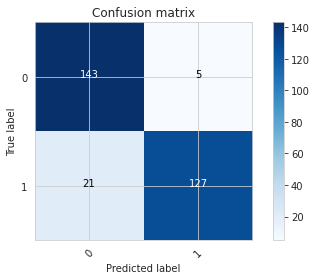

In [ ]:
# confusion matrix on the test data
ypred_lr = lrmodel.predict(X_test)
yexp_lr = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(yexp_lr, ypred_lr.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

### Model evaluation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
# classification report
print('LR')
print(metrics.classification_report(y_test,ypred_lr))

LR
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       148
           1       0.96      0.86      0.91       148

    accuracy                           0.91       296
   macro avg       0.92      0.91      0.91       296
weighted avg       0.92      0.91      0.91       296



In [ ]:
# using different evaluation measures
acc_lr = accuracy_score(y_test, ypred_lr.round())
prec_lr = precision_score(y_test, ypred_lr.round())
rec_lr = recall_score(y_test, ypred_lr.round())
f1_lr = f1_score(y_test, ypred_lr.round())

### Optimal threshold

We also want to test the optimal threshold but it will only be applied in LR part.

In [ ]:
from itertools import cycle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

Recall metric in the testing dataset:  0.9391891891891891
Confusion matrix, without normalization
[[124  24]
 [  9 139]]
Recall metric in the testing dataset:  0.8851351351351351
Confusion matrix, without normalization
[[138  10]
 [ 17 131]]
Recall metric in the testing dataset:  0.8716216216216216
Confusion matrix, without normalization
[[141   7]
 [ 19 129]]
Recall metric in the testing dataset:  0.8581081081081081
Confusion matrix, without normalization
[[142   6]
 [ 21 127]]
Recall metric in the testing dataset:  0.8581081081081081
Confusion matrix, without normalization
[[143   5]
 [ 21 127]]
Recall metric in the testing dataset:  0.8445945945945946
Confusion matrix, without normalization
[[146   2]
 [ 23 125]]
Recall metric in the testing dataset:  0.831081081081081
Confusion matrix, without normalization
[[146   2]
 [ 25 123]]
Recall metric in the testing dataset:  0.8243243243243243
Confusion matrix, without normalization
[[147   1]
 [ 26 122]]
Recall metric in the testing data

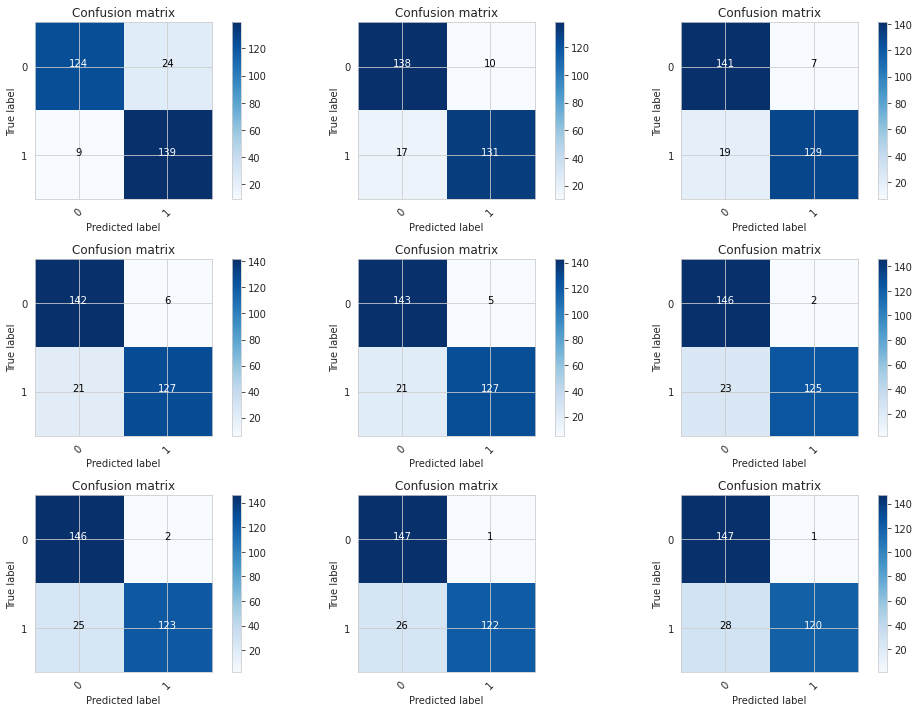

In [ ]:
# predict_prob 
y_pred_proba = lrmodel.predict_proba(X_test)  
# set different thresholds
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  

plt.figure(figsize=(15,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i # whether the y_pre_prob is greater than thresholds or not 
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names)

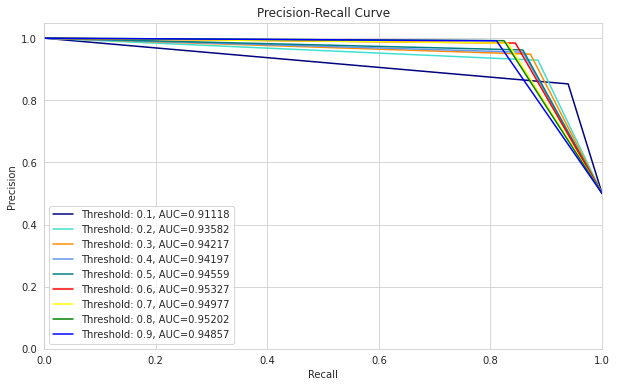

In [ ]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(10,6))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i  

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predictions_prob)
    area = auc(recall, precision)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s, AUC=%0.5f' %(i , area))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

**Precision** and **recall** are a contradictory set of variables. From the above confusion matrix and PRC curve, we can see that the smaller the threshold value, **the larger the recall value**, and the more the model can find out the number of credit card frauds, but in exchange, **the number of false positives is also larger**. As the threshold value increases, the recall value gradually decreases, the precision value gradually increases, and the number of false positives decreases. The strength of the model against credit card fraud is controlled by adjusting the model thresholds, setting smaller thresholds if you want to find out more credit card frauds, and vice versa, setting larger thresholds.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# build the model and train it
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Confusion matrix, without normalization
[[145   3]
 [ 21 127]]


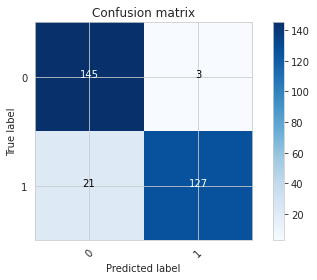

In [ ]:
# confusion matrix on the test data
ypred_rf = rfmodel.predict(X_test)
yexp_rf = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(yexp_rf, ypred_rf.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [ ]:
# classification report
print('RF')
print(metrics.classification_report(y_test,ypred_rf))

RF
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       148
           1       0.98      0.86      0.91       148

    accuracy                           0.92       296
   macro avg       0.93      0.92      0.92       296
weighted avg       0.93      0.92      0.92       296



In [ ]:
# using different evaluation measures
acc_rf = accuracy_score(y_test, ypred_rf.round())
prec_rf = precision_score(y_test, ypred_rf.round())
rec_rf = recall_score(y_test, ypred_rf.round())
f1_rf = f1_score(y_test, ypred_rf.round())

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
# build the model
svcmodel = SVC(kernel='sigmoid')
svcmodel.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Confusion matrix, without normalization
[[134  14]
 [ 26 122]]


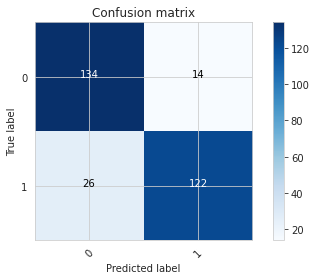

In [ ]:
# confusion matrix on the test data
ypred_svm = svcmodel.predict(X_test)
yexp_svm = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(yexp_svm, ypred_svm.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [ ]:
# classification report
print('SVM')
print(metrics.classification_report(y_test,ypred_svm))

SVM
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       148
           1       0.90      0.82      0.86       148

    accuracy                           0.86       296
   macro avg       0.87      0.86      0.86       296
weighted avg       0.87      0.86      0.86       296



In [ ]:
# using different evaluation measures
acc_svm = accuracy_score(y_test, ypred_svm.round())
prec_svm = precision_score(y_test, ypred_svm.round())
rec_svm = recall_score(y_test, ypred_svm.round())
f1_svm = f1_score(y_test, ypred_svm.round())

## k Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
myList = list(range(0,50))
neighbors = list(filter(lambda x: x%2!=0, myList))  #This will give a list of odd numbers only ranging from 0 to 50

CV_Scores = []

for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree')
    scores = cross_val_score(KNN, X_train, y_train, cv = 5, scoring='recall')
    CV_Scores.append(scores.mean())

In [ ]:
CV_Scores

[0.9186700767263428,
 0.9099317988064792,
 0.8954390451832908,
 0.892540494458653,
 0.892540494458653,
 0.892540494458653,
 0.8895993179880648,
 0.8867007672634271,
 0.8838022165387894,
 0.8809036658141517,
 0.8809036658141517,
 0.8780051150895141,
 0.8780051150895141,
 0.8809036658141517,
 0.8780051150895141,
 0.8751065643648763,
 0.8751065643648763,
 0.8751065643648763,
 0.8751065643648763,
 0.8751065643648763,
 0.8751065643648763,
 0.8722080136402386,
 0.8664109121909632,
 0.8635123614663257,
 0.8577152600170503]

In [ ]:
# We can then print the best k value 
best_k = neighbors[CV_Scores.index(max(CV_Scores))]
best_k

1

Thus, the Best 'k' value is chosen as 1

In [ ]:
KNN_best = KNeighborsClassifier(n_neighbors = best_k, algorithm = 'kd_tree')
KNN_best.fit(X_train, y_train)
ypred_knn = KNN_best.predict(X_test)

Confusion matrix, without normalization
[[142   6]
 [ 18 130]]


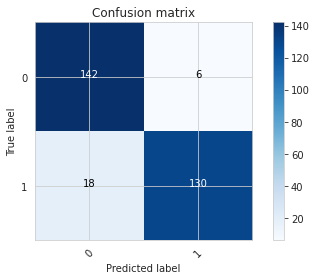

In [ ]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, ypred_knn.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [ ]:
# classification report
print('kNN')
print(metrics.classification_report(y_test,ypred_knn))

kNN
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       148
           1       0.96      0.88      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



In [ ]:
# using different evaluation measures
acc_knn = accuracy_score(y_test, ypred_knn.round())
prec_knn = precision_score(y_test, ypred_knn.round())
rec_knn = recall_score(y_test, ypred_knn.round())
f1_knn = f1_score(y_test, ypred_knn.round())

## Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [ ]:
# build the model

n_input = X_train.shape[1]

nn_model = Sequential()
nn_model.add(Dense(n_input, input_shape=(n_input,),activation='relu'))
nn_model.add(Dense(32,activation='relu'))
nn_model.add(Dense(2,activation='sigmoid')) # Binary classification -- using sigmoid function

nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 29)                870       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                960       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 1,896
Trainable params: 1,896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# set optimizer
opt = Adam(lr=0.001)

# compile model
nn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [ ]:
nn_model.fit(X_train, y_train, validation_split=0.2, batch_size=20, epochs=20, shuffle=True)

Epoch 1/20
28/28 [==============================] - 15s 21ms/step - loss: 1.0505 - accuracy: 0.5846 - val_loss: 0.3538 - val_accuracy: 0.8261
Epoch 2/20
28/28 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8811 - val_loss: 0.2760 - val_accuracy: 0.8986
Epoch 3/20
28/28 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.9056 - val_loss: 0.2265 - val_accuracy: 0.9203
Epoch 4/20
28/28 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9169 - val_loss: 0.1945 - val_accuracy: 0.9275
Epoch 5/20
28/28 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.9352 - val_loss: 0.1706 - val_accuracy: 0.9493
Epoch 6/20
28/28 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9287 - val_loss: 0.1556 - val_accuracy: 0.9565
Epoch 7/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9449 - val_loss: 0.1428 - val_accuracy: 0.9710
Epoch 8/20
28/28 [

In [ ]:
ypred_nn = nn_model.predict_classes(X_test, batch_size=200)

Confusion matrix, without normalization
[[143   5]
 [ 18 130]]


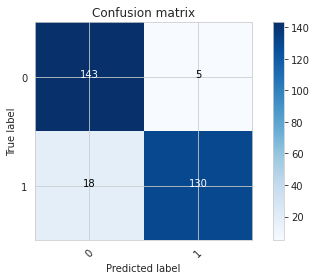

In [ ]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, ypred_nn.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [ ]:
# classification report
print('NN')
print(metrics.classification_report(y_test,ypred_nn))

NN
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       148
           1       0.96      0.88      0.92       148

    accuracy                           0.92       296
   macro avg       0.93      0.92      0.92       296
weighted avg       0.93      0.92      0.92       296



In [ ]:
# using different evaluation measures
acc_nn = accuracy_score(y_test, ypred_nn.round())
prec_nn = precision_score(y_test, ypred_nn.round())
rec_nn = recall_score(y_test, ypred_nn.round())
f1_nn = f1_score(y_test, ypred_nn.round())

# **Results**

We use "**Accuracy**" as the main evaluation criterion rather than "**Recall**" because we are now using post-sampling category-balanced data, and "Accuracy" has a better evaluation effect.


In [ ]:
results = pd.DataFrame({
    "Model":["Logistic Regression",
            "Random Forest",
            "Support Vector Machine",
            "k Nearest Neighbors",
            "Neural Network"],
    "Accuracy":[acc_lr, acc_rf, acc_svm, acc_knn, acc_nn],
    "Recall":[rec_lr, rec_rf, rec_svm, rec_knn, rec_nn],		
    "Precision":[prec_lr, prec_rf, prec_svm, prec_knn, prec_nn],
    "F1 Score":[f1_lr, f1_rf, f1_svm, f1_knn, f1_nn]
})

In [ ]:
results

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.9122,0.8581,0.9621,0.9071
1,Random Forest,0.9189,0.8581,0.9769,0.9137
2,Support Vector Machine,0.8649,0.8243,0.8971,0.8592
3,k Nearest Neighbors,0.9189,0.8784,0.9559,0.9155
4,Neural Network,0.9223,0.8784,0.9630,0.9187


From the results we could conclude that the **Neural Network** model gives the best performance.